In [48]:
# Import necessary modules
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# useful Functions 

In [49]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [50]:
def test_classifier(X, y, printLCV=False):
    import sklearn.ensemble as ske
    from sklearn.naive_bayes import GaussianNB
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.datasets import make_moons, make_circles, make_classification
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

    h = .02  # step size in the mesh

    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest",
         "AdaBoost",
         "Naive Bayes", "QDA",
          "GradientBoostingClassifier"  
            ]
    
    colors = ['blue','red','black','magenta','orange','pink','green','purple',"yellow"]

    classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    ske.GradientBoostingClassifier(n_estimators=50)
    ]

   
    scoresMean=[]
    scoresStd=[]
        # iterate over classifiers
    for name, clf,color in zip(names, classifiers, colors):
        scores = cross_val_score(clf, X,y, cv=20)
        print("Accuracy: %s  %0.4f (+/- %0.2f)" % (name,scores.mean(), scores.std()))
        scoresMean.append(scores.mean())
        scoresStd.append(scores.std())
        
        plt.plot(np.arange(0,20), scores, color=color, linestyle='-',
                 linewidth=3)
        
    plt.show()
    
    ind = np.arange(len(names))
    p1 = plt.bar(ind, scoresMean, yerr=scoresStd)

    plt.ylabel('Scores')
    plt.title('Scores by classifier')
    plt.xticks(ind, names)
    plt.yticks(np.arange(0, 1, 0.1))
    
    plt.show()
    
    if printLCV==True : 
        for name, clf,color in zip(names, classifiers, colors):
            title = "Learning Curves (" + name + ")"
            # Cross validation with 100 iterations to get smoother mean test and train
            # score curves, each time with 20% data randomly selected as a validation set.
            cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
            plot_learning_curve(clf, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

In [51]:
def Property_importance(xtrain, ytrain):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_selection import SelectFromModel
    clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
    clf = clf.fit(xtrain, ytrain)

    features = pd.DataFrame()
    features['feature'] = xtrain.columns
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    features.plot(kind='barh', figsize=(20, 20))

In [52]:
def findClusterCol(X):
    from sklearn.cluster import KMeans
    from sklearn.datasets import make_blobs
    from scipy.spatial.distance import cdist
    
    K = range(1,8)
    distortions = []
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [53]:
def manage_cluster(X,y,n):
    from sklearn.cluster import KMeans

    y_pred = KMeans(n_clusters=n, random_state=42).fit_predict(X)

    X['cluster']=y_pred
    return X

In [54]:
def printCluster(X,y,n):
    X=manage_cluster(X,y,n)
    
    Z=X.copy()
    Z['Survived']=y
    
    plt.figure(figsize=(15,8))
    ax = plt.subplot()

    ax.scatter(Z.loc[Z.cluster==1].Fare,Z.loc[Z.cluster==1].Age,c='green',s=30)
    ax.scatter(Z.loc[Z.cluster==0].Fare,Z.loc[Z.cluster==0].Age,c='red',s=30)
    ax.scatter(Z.loc[Z.cluster==2].Fare,Z.loc[Z.cluster==2].Age,c='blue',s=30)
    ax.set_xlabel('Fare')
    ax.set_ylabel('Age')
    ax.legend(('cluster1','cluster0','cluster2'),scatterpoints=1,loc='upper right',fontsize=15,)
    plt.show()
    
    
    plt.figure(figsize=(15,8))
    ax = plt.subplot()

    ax.scatter(Z.loc[(Z.cluster==1) & (Z.Survived==1)].Fare,Z.loc[(Z.cluster==1) & (Z.Survived==1)].Age,c='green',s=60)
    ax.scatter(Z.loc[(Z.cluster==0) & (Z.Survived==1)].Fare,Z.loc[(Z.cluster==0)  & (Z.Survived==1)].Age,c='red',s=60)
    ax.scatter(Z.loc[(Z.cluster==2)  & (Z.Survived==1)].Fare,Z.loc[(Z.cluster==2) & (Z.Survived==1)].Age,c='blue',s=60)
    ax.scatter(Z.loc[(Z.cluster==1) & (Z.Survived==0)].Fare,Z.loc[(Z.cluster==1) & (Z.Survived==0)].Age,c='black',s=30)
    ax.scatter(Z.loc[(Z.cluster==0) & (Z.Survived==0)].Fare,Z.loc[(Z.cluster==0)  & (Z.Survived==0)].Age,c='orange',s=30)
    ax.scatter(Z.loc[(Z.cluster==2)  & (Z.Survived==0)].Fare,Z.loc[(Z.cluster==2) & (Z.Survived==0)].Age,c='magenta',s=30)
    ax.set_xlabel('Fare')
    ax.set_ylabel('Age')
    ax.legend(('cluster1Ok','cluster0Ok','cluster2Ok','cluster1ko','cluster0ko','cluster2ko'),scatterpoints=1,loc='upper right',fontsize=15,)
    plt.show()
    

In [55]:
def findvaluescountbycolumns(df):
    for name in df.columns:
        _=sns.countplot(x=name, data=df)
        plt.show()

# Examples 

## How to create a subset of features ?

In [56]:
def parse_quickandDirty(X):
    target=X.Survived
    X=X[['Pclass','SibSp','Parch','Fare']]   
    return X,target

In [57]:
def parse_quickandDirtywithPclass(X):
    target=X.Survived
    X=X[['Pclass','SibSp','Parch','Fare']]   
    return X,target

In [58]:
def parse_withSex(X):
    target=X.Survived
    X_sex=pd.get_dummies(df.Sex,prefix="S",prefix_sep="_")
    X_new = pd.concat([X,X_sex], axis=1)
    X=X_new[['Pclass','SibSp','Parch','Fare','S_female']]   
    return X, target

In [82]:
def parse_withSexAndAge(df):
    X=df.copy()
    X_sex=pd.get_dummies(df.Sex,prefix="S",prefix_sep="_")
    X_new = pd.concat([X,X_sex], axis=1)
    X=X_new[['Survived','Pclass','SibSp','Parch','Fare','S_female','Age']]
    X=X.dropna()
    target=X.Survived
    X=X[['Pclass','SibSp','Parch','Fare','S_female','Age']]
    return X, target
    
def parse_withSexAndAgeWithNan(df):
    X=df.copy()
    X_sex=pd.get_dummies(df.Sex,prefix="S",prefix_sep="_")
    X_new = pd.concat([X,X_sex], axis=1)
    X=X_new[['Survived','Pclass','SibSp','Parch','Fare','S_female','Age']]

    target=X.Survived
    X=X[['Pclass','SibSp','Parch','Fare','S_female','Age']]
    return X, target

# Import the data from a CSV

In [83]:
# engine ="python" is usued in order to manage french special character
df = pd.read_csv('trainTitanic.csv',sep=",", decimal=".",engine='python')


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [86]:
X=df.copy()
y= X.Survived
X.pop("Survived")

X.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [87]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63

Accuracy: Nearest Neighbors  nan (+/- nan)
Accuracy: Linear SVM  nan (+/- nan)
Accuracy: RBF SVM  nan (+/- nan)


/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 814, in check_X

Accuracy: Decision Tree  nan (+/- nan)
Accuracy: Random Forest  nan (+/- nan)


/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 814, in

Accuracy: AdaBoost  nan (+/- nan)
Accuracy: Naive Bayes  nan (+/- nan)
Accuracy: QDA  nan (+/- nan)


/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 207, in fit
    X, y = self._validate_data(X, y)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 814, in check_X_y
    X = check

Accuracy: GradientBoostingClassifier  nan (+/- nan)


/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 412, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/llesbats/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py"

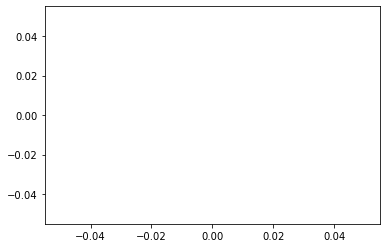

/home/llesbats/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


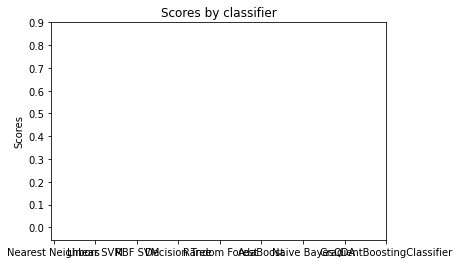

In [88]:
test_classifier(X,y)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Accuracy: Nearest Neighbors  0.7104 (+/- 0.07)
Accuracy: Linear SVM  0.7788 (+/- 0.05)
Accuracy: RBF SVM  0.6261 (+/- 0.04)
Accuracy: Decision Tree  0.7914 (+/- 0.06)
Accuracy: Random Forest  0.8040 (+/- 0.05)
Accuracy: AdaBoost  0.8012 (+/- 0.04)
Accuracy: Naive Bayes  0.7816 (+/- 0.04)
Accuracy: QDA  0.7956 (+/- 0.05)
Accuracy: GradientBoostingClassifier  0.8208 (+/- 0.05)


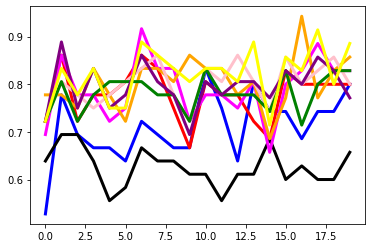

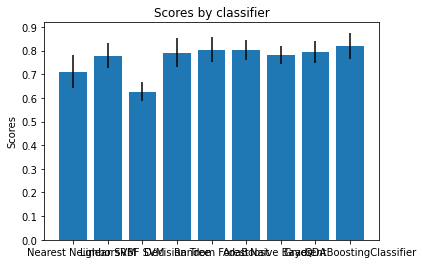

In [105]:
Xquick, yquick = parse_withSexAndAge(df)

test_classifier(Xquick,yquick)

Accuracy: Nearest Neighbors  0.6704 (+/- 0.06)
Accuracy: Linear SVM  0.6750 (+/- 0.07)
Accuracy: RBF SVM  0.7096 (+/- 0.07)
Accuracy: Decision Tree  0.6996 (+/- 0.07)
Accuracy: Random Forest  0.7165 (+/- 0.07)
Accuracy: AdaBoost  0.6996 (+/- 0.06)
Accuracy: Naive Bayes  0.6784 (+/- 0.06)
Accuracy: QDA  0.6817 (+/- 0.06)
Accuracy: GradientBoostingClassifier  0.7288 (+/- 0.06)


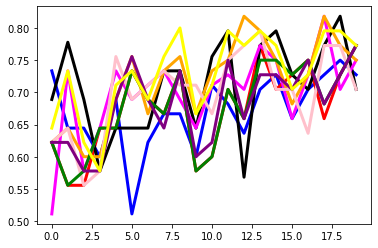

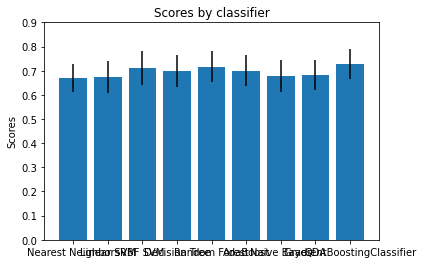

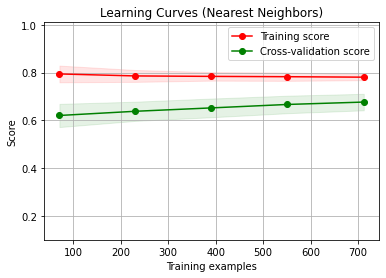

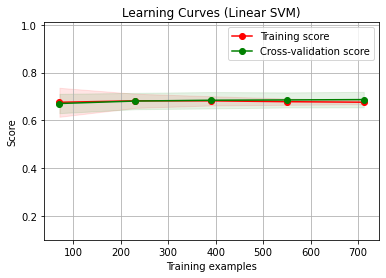

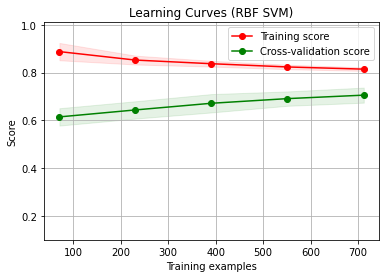

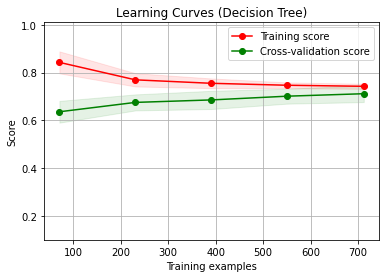

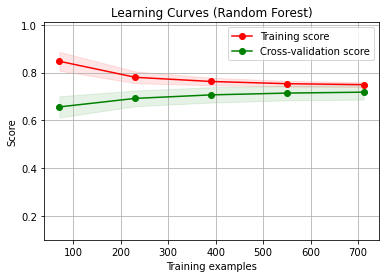

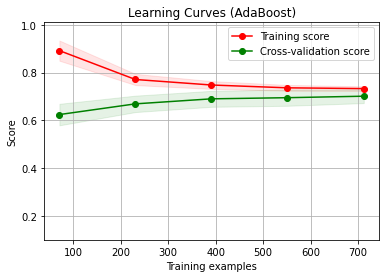

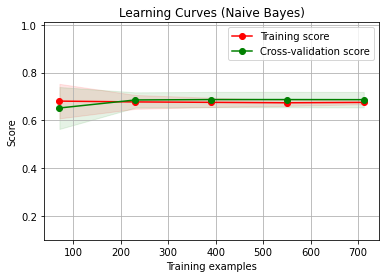

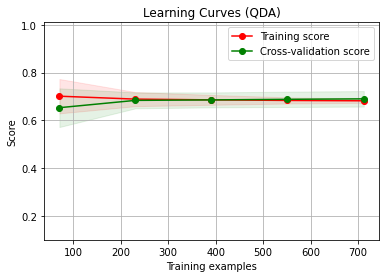

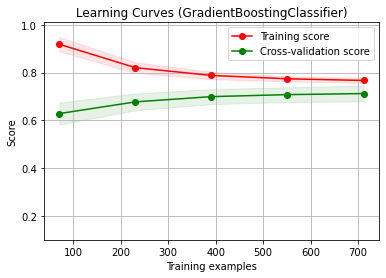

In [91]:
test_classifier(Xquick,yquick,True)

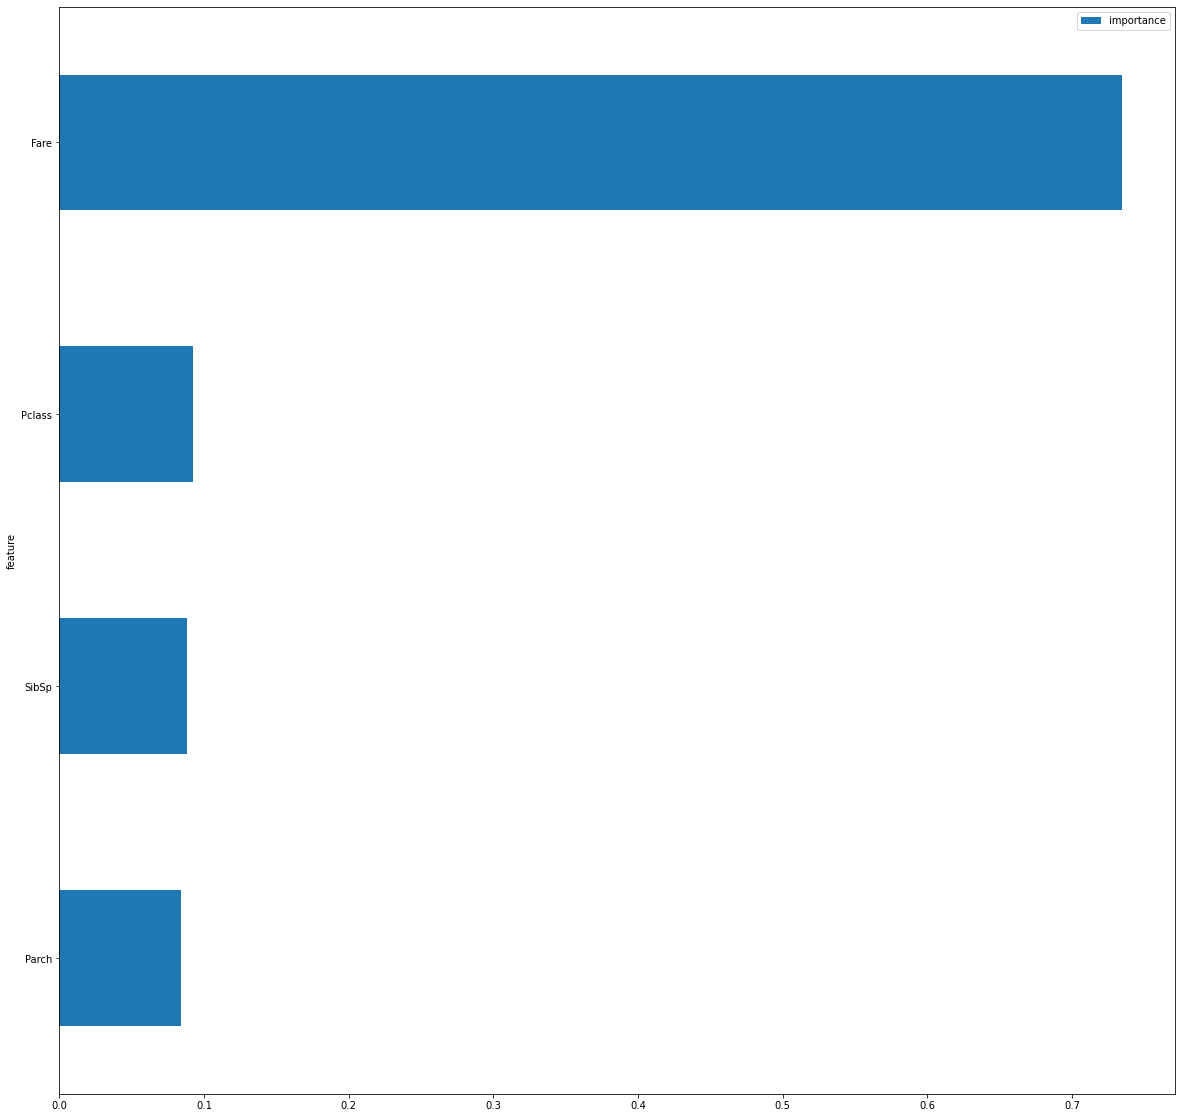

In [92]:
Property_importance(Xquick,yquick)

In [93]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [94]:
 pd.get_dummies(df.Sex,prefix="S",prefix_sep="_")

,S_female,S_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [95]:
Xsex, ysex = parse_withSex(df)


Accuracy: Nearest Neighbors  0.7723 (+/- 0.07)
Accuracy: Linear SVM  0.7866 (+/- 0.04)
Accuracy: RBF SVM  0.7913 (+/- 0.07)
Accuracy: Decision Tree  0.8058 (+/- 0.06)
Accuracy: Random Forest  0.7923 (+/- 0.05)
Accuracy: AdaBoost  0.7980 (+/- 0.06)
Accuracy: Naive Bayes  0.7845 (+/- 0.04)
Accuracy: QDA  0.7821 (+/- 0.04)
Accuracy: GradientBoostingClassifier  0.8248 (+/- 0.05)


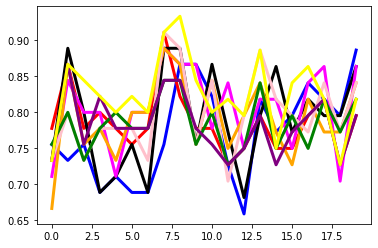

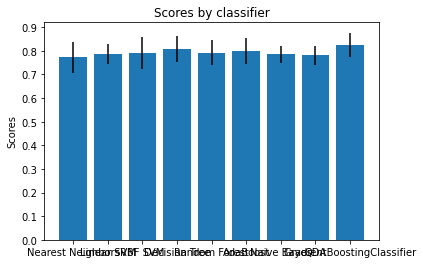

In [96]:
test_classifier(Xsex,ysex)

In [97]:
Xsex.head(10)

,Pclass,SibSp,Parch,Fare,S_female
0,3,1,0,7.2500,0
1,1,1,0,71.2833,1
2,3,0,0,7.9250,1
3,1,1,0,53.1000,1
4,3,0,0,8.0500,0
5,3,0,0,8.4583,0
6,1,0,0,51.8625,0
7,3,3,1,21.0750,0
8,3,0,2,11.1333,1
9,2,1,0,30.0708,1


Accuracy: Nearest Neighbors  0.7723 (+/- 0.07)
Accuracy: Linear SVM  0.7866 (+/- 0.04)
Accuracy: RBF SVM  0.7913 (+/- 0.07)
Accuracy: Decision Tree  0.8058 (+/- 0.06)
Accuracy: Random Forest  0.7845 (+/- 0.06)
Accuracy: AdaBoost  0.7980 (+/- 0.06)
Accuracy: Naive Bayes  0.7845 (+/- 0.04)
Accuracy: QDA  0.7821 (+/- 0.04)
Accuracy: GradientBoostingClassifier  0.8248 (+/- 0.05)


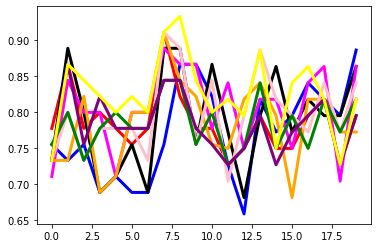

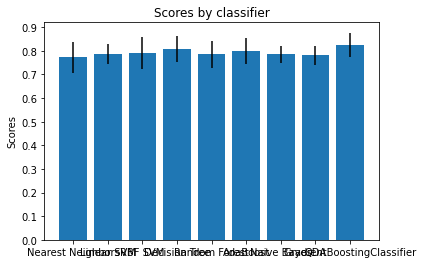

In [98]:

test_classifier(Xsex,ysex)

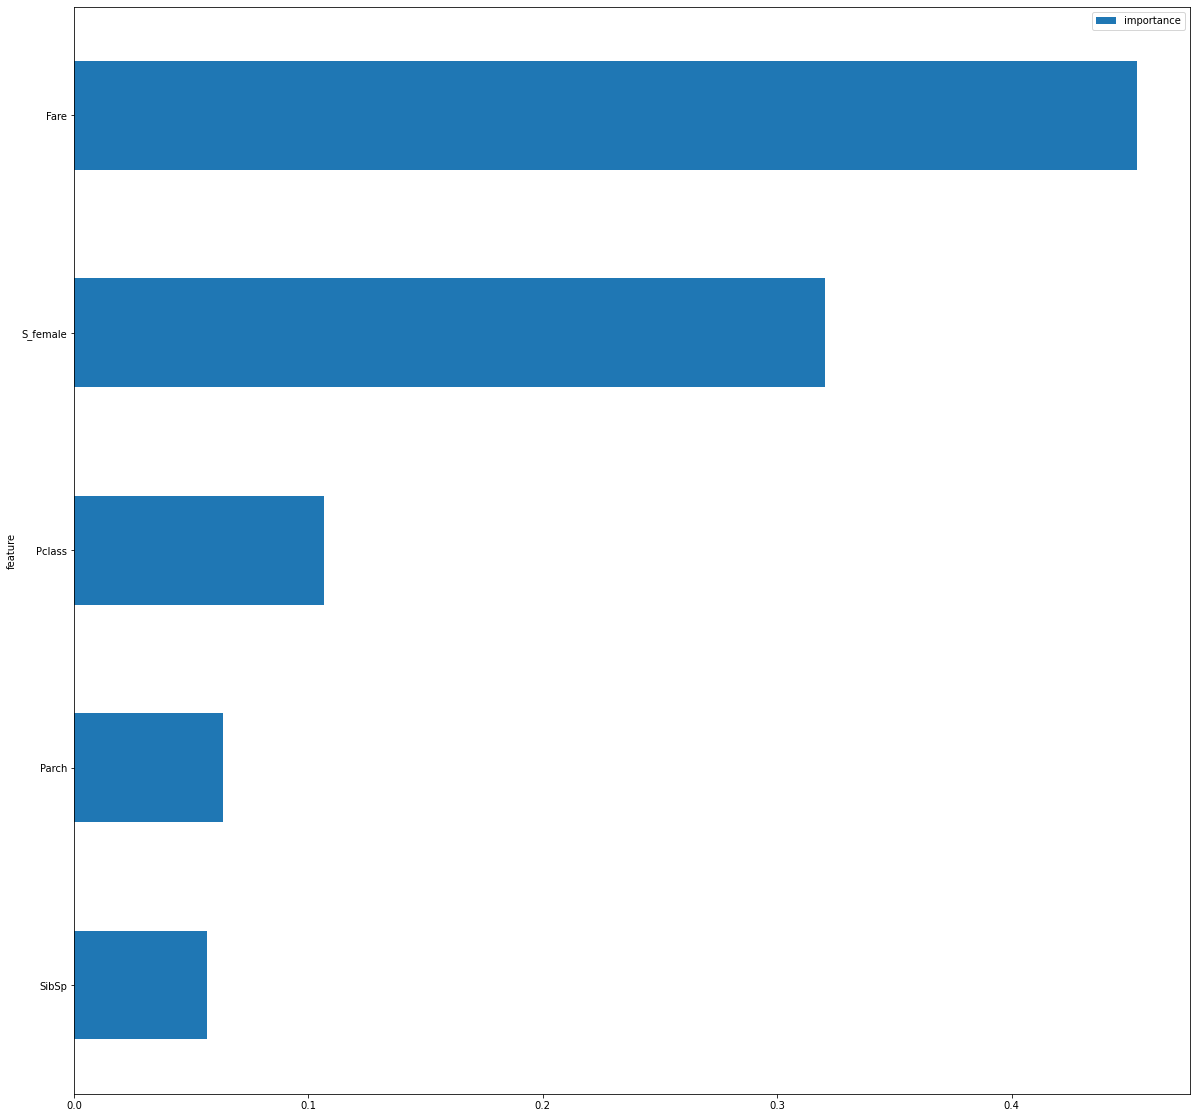

In [99]:
Property_importance(Xsex,ysex)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Accuracy: Nearest Neighbors  0.7240 (+/- 0.07)
Accuracy: Linear SVM  0.7855 (+/- 0.04)
Accuracy: RBF SVM  0.6563 (+/- 0.06)
Accuracy: Decision Tree  0.8181 (+/- 0.07)
Accuracy: Random Forest  0.7947 (+/- 0.05)
Accuracy: AdaBoost  0.8059 (+/- 0.

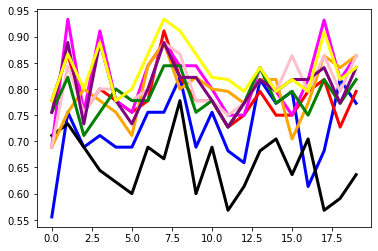

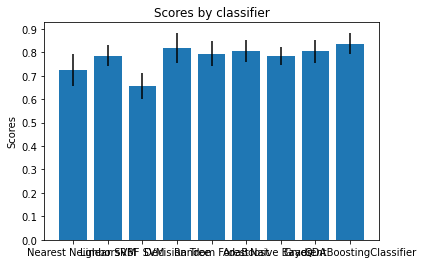

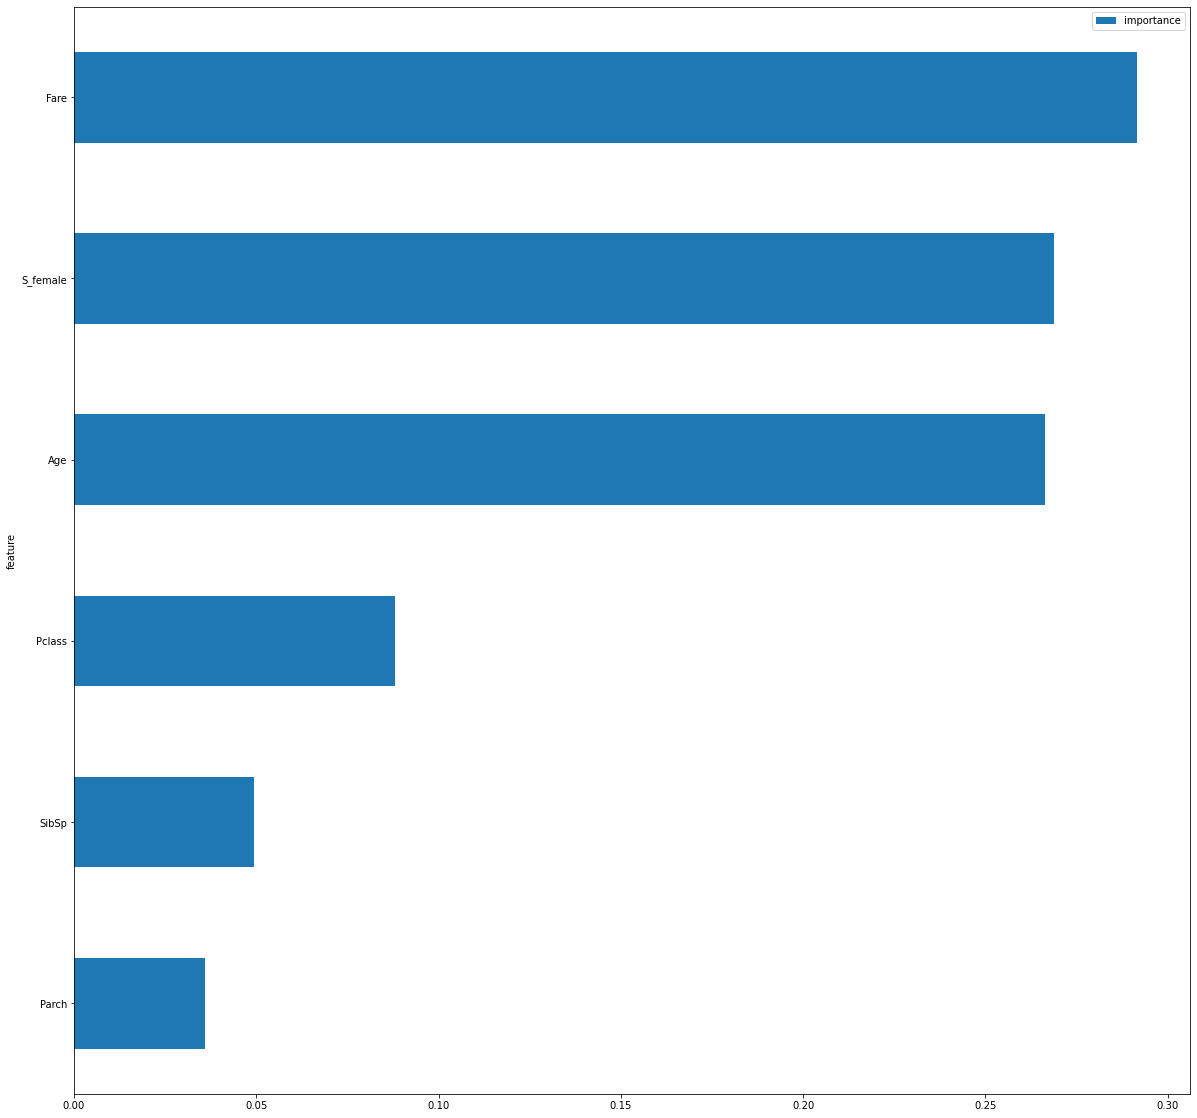

In [107]:
dfmiss = df.copy()
dfmiss.loc[dfmiss.Age.isnull(),"Age"]=df.Age.mean()
dfmiss.info()

Xmiss, Ymiss = parse_withSexAndAge(dfmiss)

test_classifier(Xmiss, Ymiss, printLCV=False)
Property_importance(Xmiss,Ymiss)

Accuracy: Nearest Neighbors  0.6704 (+/- 0.06)
Accuracy: Linear SVM  0.6750 (+/- 0.07)
Accuracy: RBF SVM  0.7096 (+/- 0.07)
Accuracy: Decision Tree  0.6984 (+/- 0.07)
Accuracy: Random Forest  0.7176 (+/- 0.06)
Accuracy: AdaBoost  0.6996 (+/- 0.06)
Accuracy: Naive Bayes  0.6784 (+/- 0.06)
Accuracy: QDA  0.6817 (+/- 0.06)
Accuracy: GradientBoostingClassifier  0.7277 (+/- 0.06)


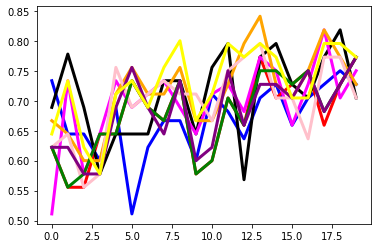

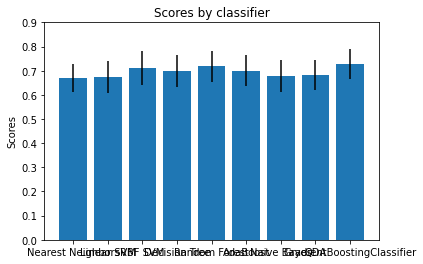

In [101]:
Xquick2, yquick2 = parse_quickandDirty(df)

test_classifier(Xquick2,yquick2)

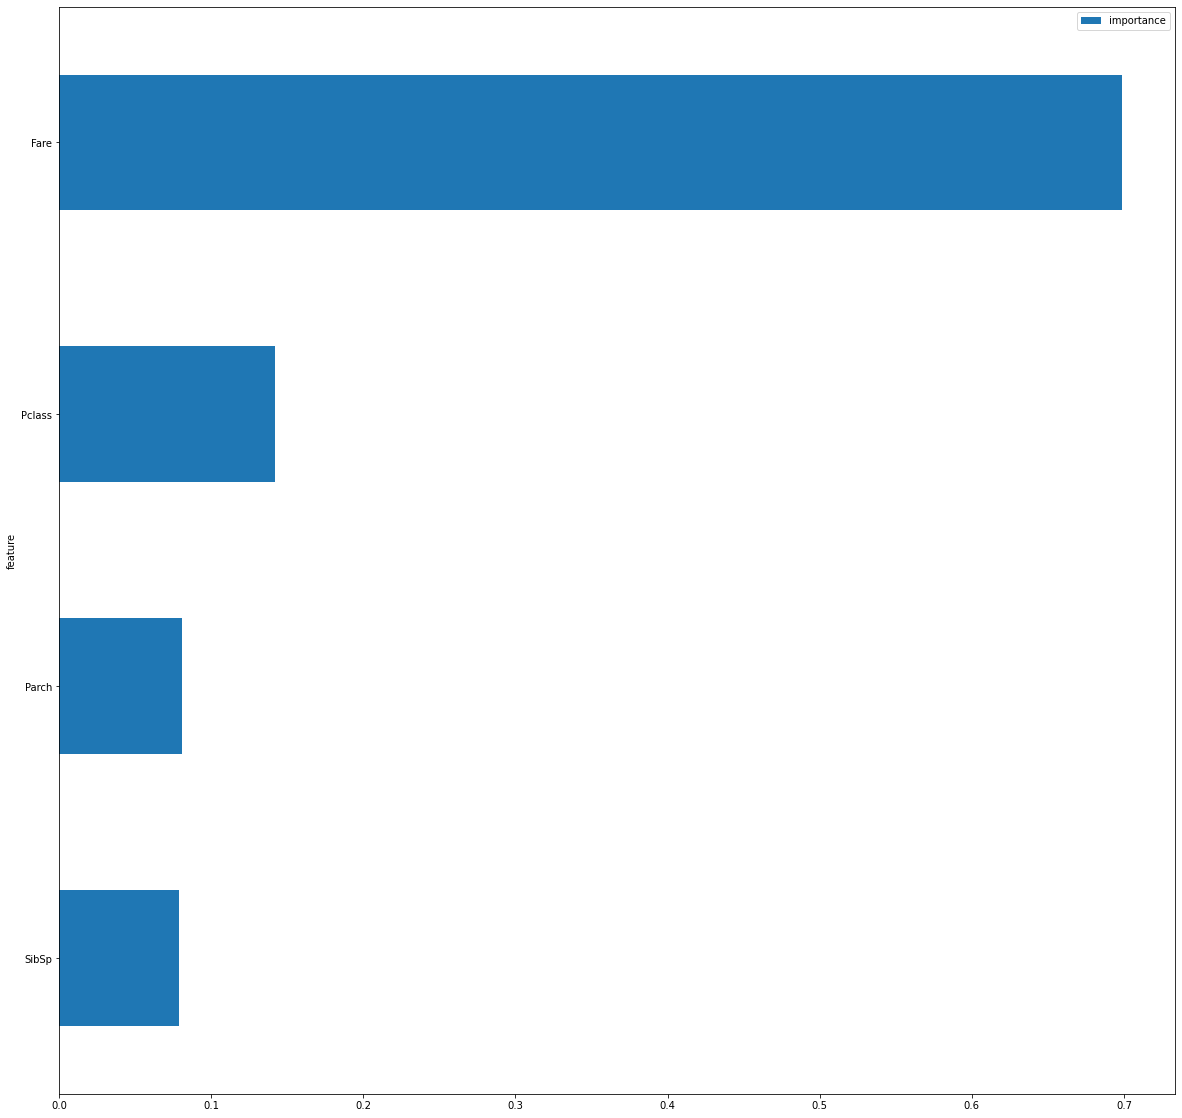

In [102]:
Property_importance(Xquick2,yquick2)

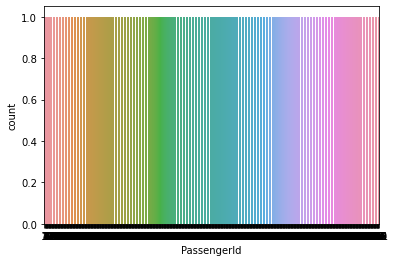

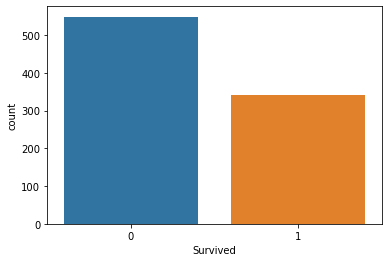

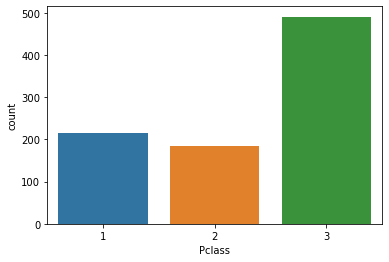

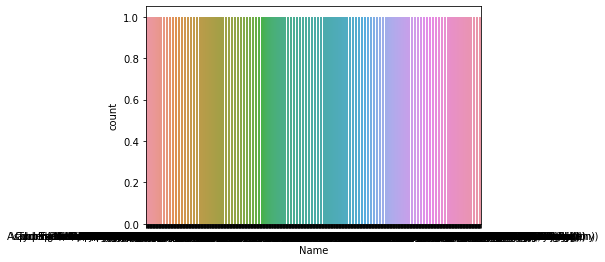

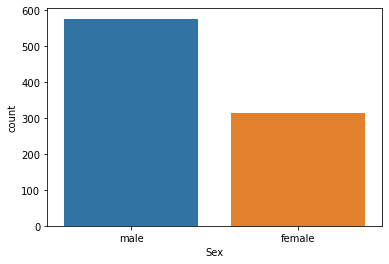

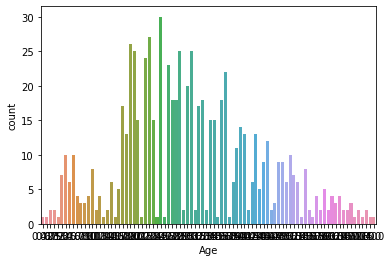

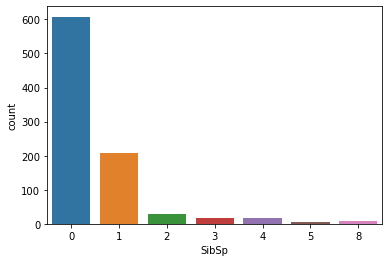

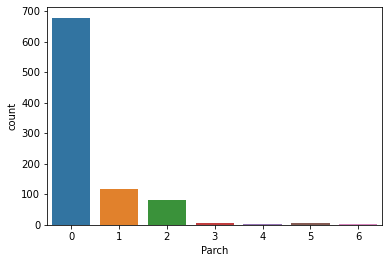

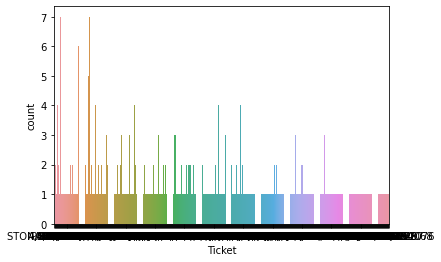

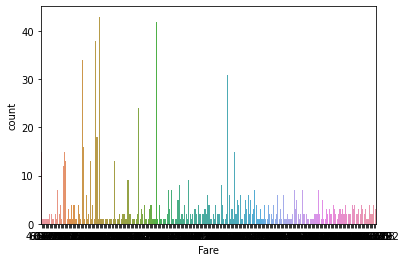

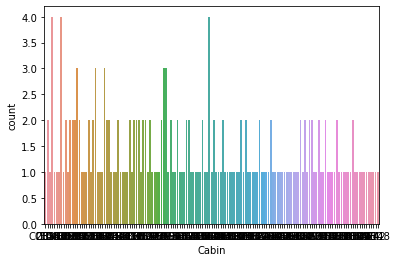

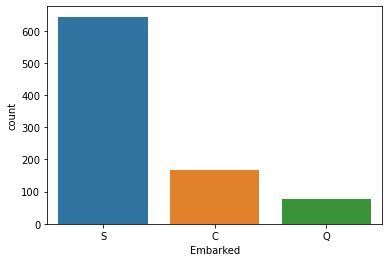

In [108]:
findvaluescountbycolumns(df)